In [65]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [66]:
# Load in and read HPI/CPI data
file = '../Resources/US_CpiHpiAvg.csv'

hpi_df = pd.read_csv(file)
hpi_df

,Place Name,Year,Index (SA),Average CPI
0,United States,1991,100.660833,136.191667
1,United States,1992,103.180000,140.316667
2,United States,1993,105.669167,144.458333
3,United States,1994,109.200000,148.225000
4,United States,1995,112.015833,152.383333
5,United States,1996,115.316667,156.850000
6,United States,1997,118.604167,160.516667
7,United States,1998,124.329167,163.008333
8,United States,1999,131.912500,166.575000
9,United States,2000,140.740000,172.200000


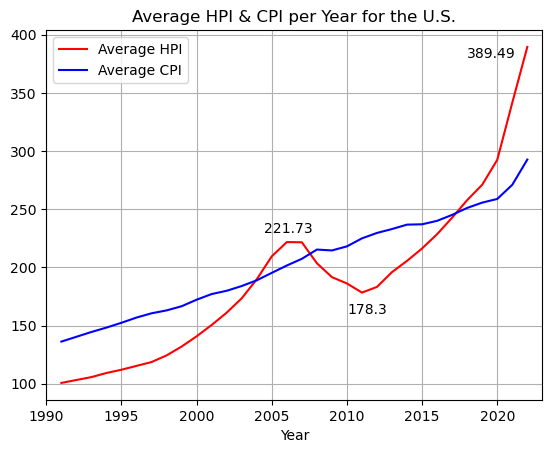

In [74]:
index, = plt.plot(hpi_df['Year'], hpi_df['Index (SA)'], 
                  color='red', label= 'Average HPI')
cpi, = plt.plot(hpi_df['Year'], hpi_df['Average CPI'], 
                color='blue', label= 'Average CPI')
plt.xlabel('Year')
plt.xlim(1990, 2023)
plt.annotate(round(hpi_df['Index (SA)'][15], 2), (2004.5, 230))
plt.annotate(round(hpi_df['Index (SA)'][20], 2), (2010, 160))
plt.annotate(round(hpi_df['Index (SA)'][31], 2), (2018, 380))
plt.title('Average HPI & CPI per Year for the U.S.')
plt.legend()
plt.grid()
plt.show()


### Now we want % change!

In [68]:
# Create new columns detailing percentage change
hpi_df['Index (SA) % Change'] = hpi_df['Index (SA)'].pct_change()
hpi_df['Average CPI % Change'] = hpi_df['Average CPI'].pct_change()

# If the percent change is 0, replace NaN with 0
hpi_df = hpi_df.fillna(0)

# Format columns as percentages
hpi_df['Index (SA) % Change'] = hpi_df['Index (SA) % Change'].map("{:.2%}".format)
hpi_df['Average CPI % Change'] = hpi_df['Average CPI % Change'].map("{:.2%}".format)

hpi_df

,Place Name,Year,Index (SA),Average CPI,Index (SA) % Change,Average CPI % Change
0,United States,1991,100.660833,136.191667,0.00%,0.00%
1,United States,1992,103.180000,140.316667,2.50%,3.03%
2,United States,1993,105.669167,144.458333,2.41%,2.95%
3,United States,1994,109.200000,148.225000,3.34%,2.61%
4,United States,1995,112.015833,152.383333,2.58%,2.81%
5,United States,1996,115.316667,156.850000,2.95%,2.93%
6,United States,1997,118.604167,160.516667,2.85%,2.34%
7,United States,1998,124.329167,163.008333,4.83%,1.55%
8,United States,1999,131.912500,166.575000,6.10%,2.19%
9,United States,2000,140.740000,172.200000,6.69%,3.38%


In [69]:
# Here is where I want to plot percent change...

In [70]:
# We want to calculate correlation coefficient
# Reformatted the CPI dataset so that it is in column format with months and years
cpi_file = '../Resources/us_cpi.csv'

us_cpi_monthly = pd.read_csv(cpi_file)

# Filter out first and second half rows
us_cpi_monthly = us_cpi_monthly.loc[(us_cpi_monthly['Period'] != 'S01') & 
                                    (us_cpi_monthly['Period'] != 'S02')]

# Delete last row to be consistent with HPI data timeframe (no 12th month in 2022 for HPI dataset)
us_cpi_monthly = us_cpi_monthly.drop([445])

# Get rid of series ID
monthly_cpi_clean = us_cpi_monthly[['Year', 'Period', 'Value']]

# Rename value to CPI
monthly_cpi_clean = monthly_cpi_clean.rename(columns={'Value': 'CPI'})

monthly_cpi_clean

,Year,Period,CPI
0,1991,M01,134.600
1,1991,M02,134.800
2,1991,M03,135.000
3,1991,M04,135.200
4,1991,M05,135.600
...,...,...,...
440,2022,M07,296.276
441,2022,M08,296.171
442,2022,M09,296.808
443,2022,M10,298.012


In [71]:
# Loan in HPI data to include months
hpi_file = '../Resources/clean_monthly_hpi.csv'

us_hpi_monthly = pd.read_csv(hpi_file)

# Filter fo national data only
us_hpi_monthly = us_hpi_monthly.loc[us_hpi_monthly['Place Name'] == 'United States', :]

us_hpi_monthly = us_hpi_monthly[['Place Name', 'Year', 'Period', 'Index (SA)']]

us_hpi_monthly

,Place Name,Year,Period,Index (SA)
3447,United States,1991,1,100.00
3448,United States,1991,2,100.45
3449,United States,1991,3,100.48
3450,United States,1991,4,100.33
3451,United States,1991,5,100.39
...,...,...,...,...
3825,United States,2022,7,394.40
3826,United States,2022,8,392.18
3827,United States,2022,9,392.77
3828,United States,2022,10,392.78


In [72]:
# Calculate r and p value
pearson_coef, p_value = stats.pearsonr(us_hpi_monthly['Index (SA)'], monthly_cpi_clean['CPI'])
print(f'HPI and CPI are very strongly correlated with an r-value of {pearson_coef}. P-Value: {p_value}')

HPI and CPI are very strongly correlated with an r-value of 0.931226759860891. P-Value: 4.1842127879844044e-169


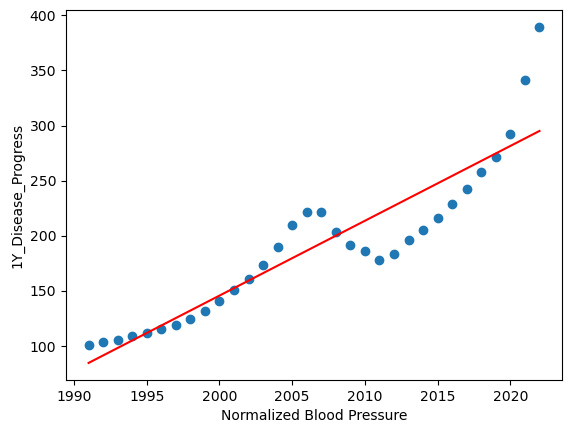

In [73]:
# Linear regression to predict future HPI
x_values = hpi_df['Year']
y_values = hpi_df['Index (SA)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
plt.show()